In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


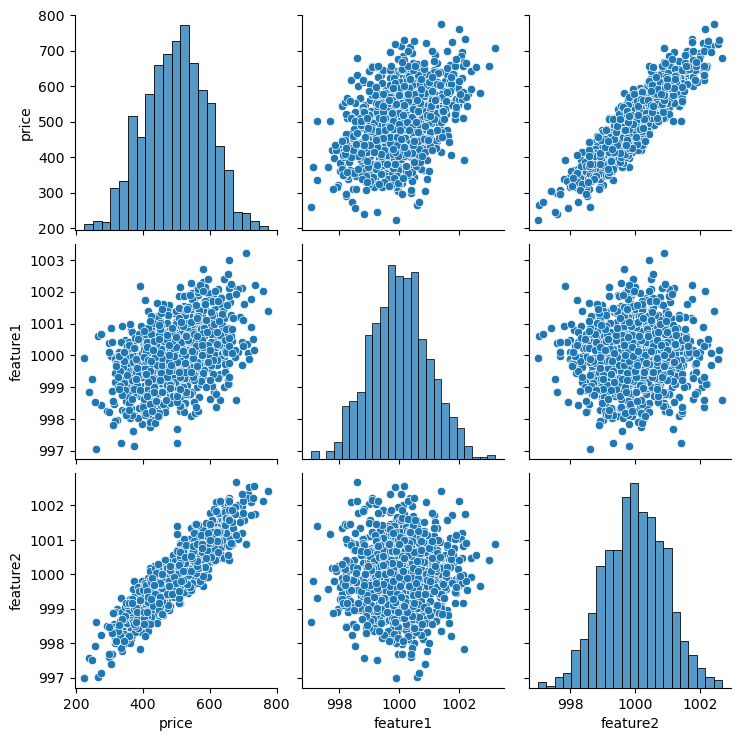

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [15]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [16]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 8ms/step - loss: 256720.0156
Epoch 2/250
22/22 [==============================] - 0s 7ms/step - loss: 256690.3594
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 256667.4219
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 256645.3906
Epoch 5/250
22/22 [==============================] - 0s 5ms/step - loss: 256623.5000
Epoch 6/250
22/22 [==============================] - 0s 5ms/step - loss: 256601.6250
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 256579.7188
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 256557.8281
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 256536.0156
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 256514.0781
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 256492.2500
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

In [17]:
model.history.history

{'loss': [256720.015625,
  256690.359375,
  256667.421875,
  256645.390625,
  256623.5,
  256601.625,
  256579.71875,
  256557.828125,
  256536.015625,
  256514.078125,
  256492.25,
  256470.234375,
  256448.390625,
  256426.5625,
  256404.609375,
  256382.78125,
  256360.9375,
  256339.0625,
  256317.140625,
  256295.296875,
  256273.390625,
  256251.515625,
  256229.625,
  256207.859375,
  256185.96875,
  256164.015625,
  256142.125,
  256120.296875,
  256098.375,
  256076.53125,
  256054.75,
  256032.796875,
  256010.96875,
  255989.09375,
  255967.296875,
  255945.4375,
  255923.515625,
  255901.625,
  255879.84375,
  255857.9375,
  255836.0625,
  255814.265625,
  255792.34375,
  255770.53125,
  255748.65625,
  255726.765625,
  255704.921875,
  255683.0,
  255661.1875,
  255639.359375,
  255617.53125,
  255595.609375,
  255573.84375,
  255552.0,
  255530.15625,
  255508.3125,
  255486.46875,
  255464.609375,
  255442.8125,
  255420.9375,
  255399.109375,
  255377.25,
  255355.5,
  

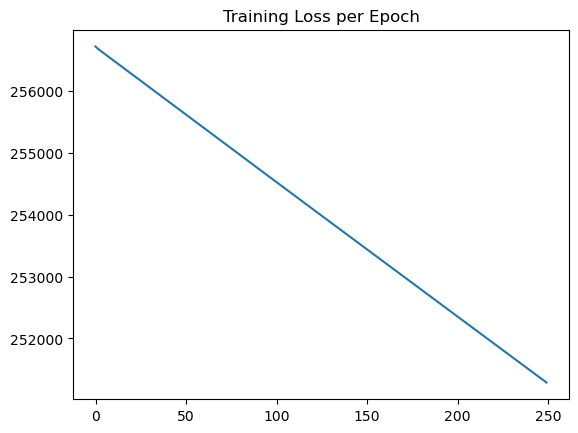

In [18]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [19]:
model.metrics_names

['loss']

In [20]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [21]:
training_score

251277.8125

In [22]:
test_score

253687.859375

In [23]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [24]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [25]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [27]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [28]:
pred_df.columns = ['Test Y','Model Predictions']

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

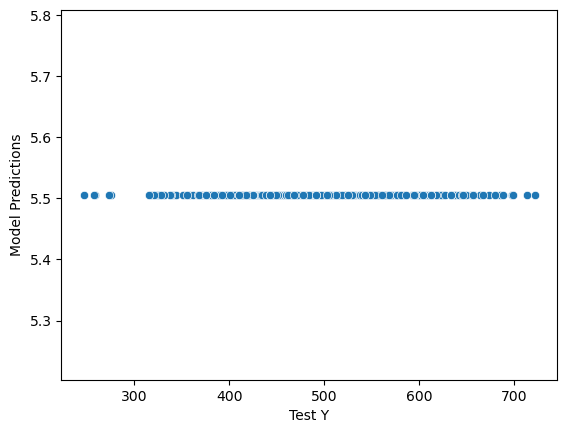

In [29]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [31]:
from tensorflow.keras.models import load_model

model.save('my_model.h5') 

later_model = load_model('my_model.h5')